# CS676 Final Project
## By: Paul Tuccinardi

### Goal of Project: Find a way to compare different clustering algorithms.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
from scipy.spatial.distance import cdist
from shapely import Polygon
import math
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Part 1: Creating dataset and centers

In [2]:
#Creating dataset points
dataset = [[1,2],[2,3],[1,4],[5,1],
           [7,8],[8,8],[1,3],[3,3],[6,5],
           [9,4],[9,6],[6,9],[1,5],[4,4],
           [6,3],[2,1],[5,5],[5,7],[7,2],[8,4]]
dataset = np.array(dataset)

### Step 2: Find optimal value of k for K-mediods

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(dataset)
    kmeans_model.fit(dataset)
 
    distortions.append(sum(np.min(cdist(dataset, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / dataset.shape[0])
    inertias.append(kmeans_model.inertia_)
 
    mapping1[k] = sum(np.min(cdist(dataset, kmeans_model.cluster_centers_,
                                   'euclidean'), axis=1)) / dataset.shape[0]
    mapping2[k] = kmeans_model.inertia_

Create the centers based on optimal value for K

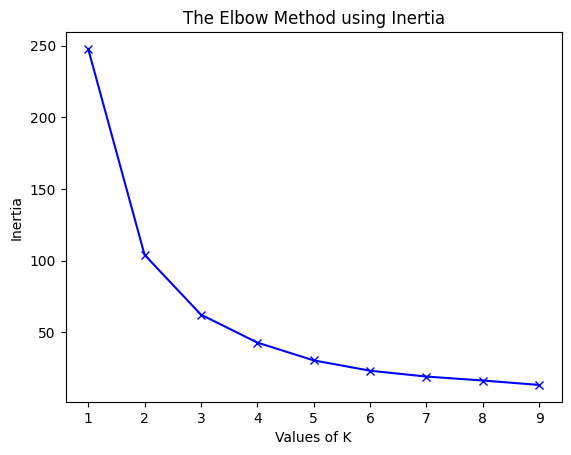

In [4]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Based on the graph we can proceed while using a value of 5 for our clustering methods. Now we create our centers and medoids.

In [5]:
center = [[1,2], [7,8], [3,3],[5,1], [9,4]]

## Part 2: Creating K-means K-medians and K-mediods algorithms

In [6]:
k=5

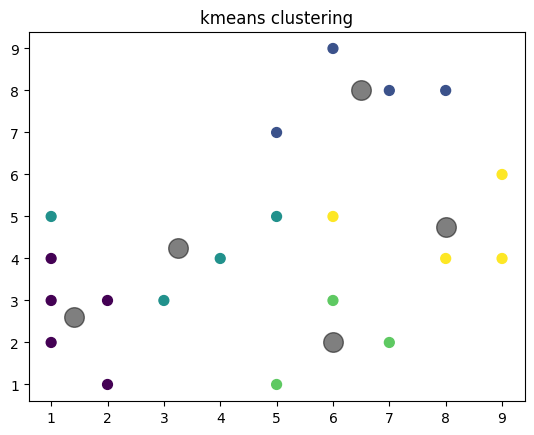

In [7]:
center = [[1,2], [7,8], [3,3],[5,1], [9,4]]
kmeans = KMeans(n_clusters=k, init=center, n_init=1).fit(dataset)
y_kmeans = kmeans.predict(dataset)
plt_kmeans = plt.scatter(dataset[:, 0], dataset[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt_kmeans = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("kmeans clustering")
plt.show()

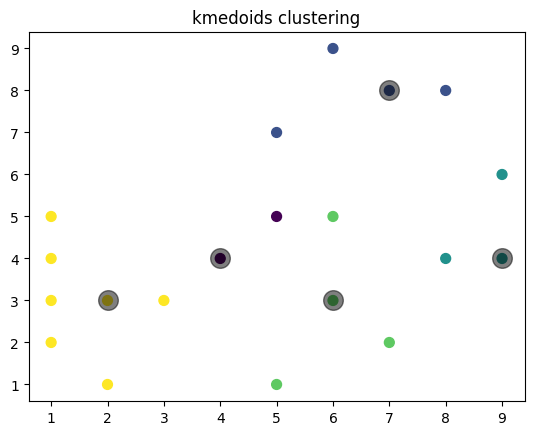

In [8]:
#still need to apply center to the clustering algo
center = [[1,2], [7,8], [3,3],[5,1], [9,4]]
kmedoids = KMedoids(n_clusters=k, random_state=0).fit(dataset)
plt_kmedoids = plt.scatter(dataset[:, 0], dataset[:, 1],c=kmedoids.labels_, s=50, cmap='viridis')

centers = kmedoids.cluster_centers_

plt_kmedoids = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("kmedoids clustering")
plt.show()

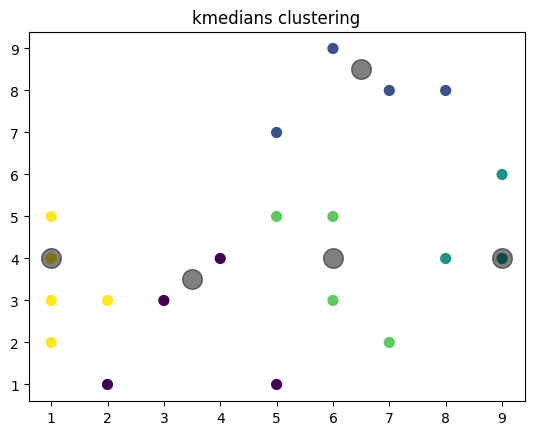

In [9]:
center = [[1,2], [7,8], [3,3],[5,1], [9,4]]
kmedian = kmedians(dataset, centers)
kmedian.process()
clusters = kmedian.get_clusters()


k_median_cluster= [-1]*len(dataset)
for i in range(len(clusters)):
    temp = clusters[i]
    for j in range(len(dataset)):
        for k in range(len(temp)):
            if j == temp[k]:
                k_median_cluster[j] = i

medians = kmedian.get_medians()
medians= np.array(medians)
plt_kmedians = plt.scatter(dataset[:, 0], dataset[:, 1],c=k_median_cluster, s=50, cmap='viridis')
plt_kmedians = plt.scatter(medians[:, 0], medians[:, 1], c='black', s=200, alpha=0.5);
plt.title("kmedians clustering")
plt.show()

## Part 3: Creating outline of different clusters and graph

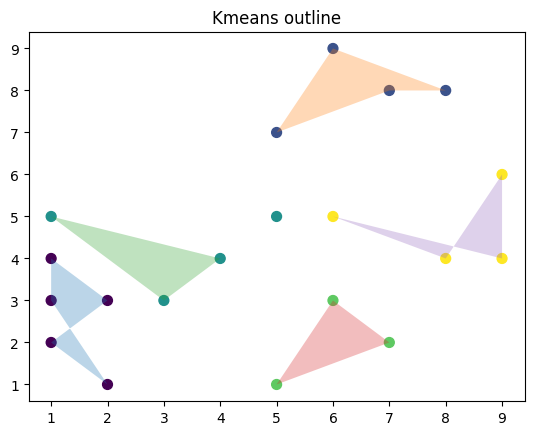

In [10]:
figure , axes = plt.subplots()
plt_kmeans = plt.scatter(dataset[:, 0], dataset[:, 1],c = y_kmeans ,cmap='viridis', s=50)

for i in range(k+1):
    clust = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3)
        axes.set_aspect(1)
        axes.add_artist(circle)  
    if(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3)
        
    

plt.title("Kmeans outline")
plt.show()

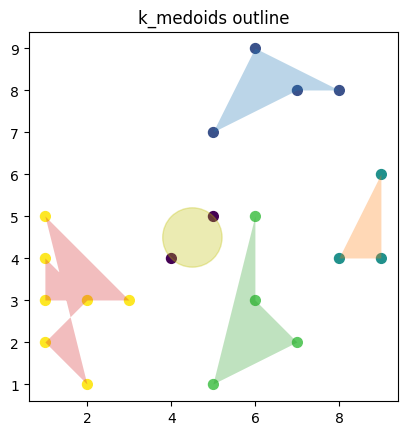

In [11]:
figure , axes = plt.subplots()

plt_kmedoids = plt.scatter(dataset[:, 0], dataset[:, 1],c=kmedoids.labels_, s=50, cmap='viridis')
k_medoids_labels = kmedoids.labels_
for i in range(k+1):
    clust = []
    for j in range(len(k_medoids_labels)):
        if k_medoids_labels[j] == i:
            clust.append(dataset[j])      
    clust= np.array(clust)

    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3, color = 'y')
        axes.set_aspect( 1 )
        axes.add_artist( circle )
    if(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3)
        
plt.title("k_medoids outline")
plt.show()

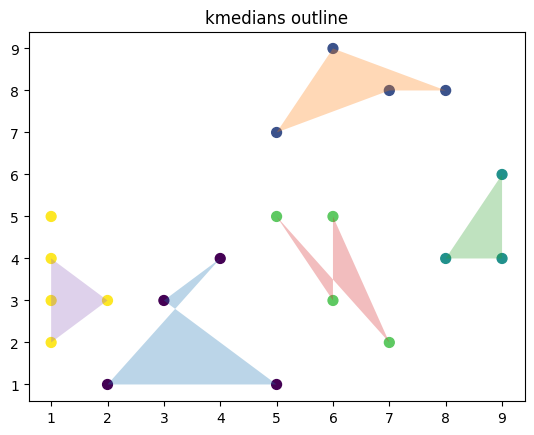

In [12]:
figure , axes = plt.subplots()
clusters = kmedian.get_clusters()
k_median_cluster= [-1]*len(dataset)
for i in range(len(clusters)):
    temp = clusters[i]
    for j in range(len(dataset)):
        for k in range(len(temp)):
            if j == temp[k]:
                k_median_cluster[j] = i

medians = kmedian.get_medians()
medians= np.array(medians)
plt_kmedians = plt.scatter(dataset[:, 0], dataset[:, 1],c=k_median_cluster, s=50, cmap='viridis')



for i in range(k+1):
    clust = []
    for j in range(len(k_median_cluster)):
        if k_median_cluster[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3)
        axes.set_aspect(1)
        axes.add_artist(circle)  
    if(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3)
        
plt.title("kmedians outline")
plt.show()

## Part 4: Compute area of the clusters

In [13]:
center
kmeans
y_kmeans
areas = []
for i in range(k+1):
    clust = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            clust.append(dataset[j])
    clust = np.array(clust)    
    if(len(clust)==1):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print(0)
        areas.append(0)
        print()
    elif(len(clust) ==2):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        area=math.pi* r * r
        area = round(area,3)
        print(area)
        areas.append(area)
        print()
    else:
        pgon= Polygon(clust)
        areas.append(pgon.area)
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print("The area of the cluster is: " + str(pgon.area))
        print()
df_kmeans = pd.DataFrame(areas)


Cluster 0 contains the following points: [[1 2]
 [2 3]
 [1 4]
 [1 3]
 [2 1]]
The area of the cluster is: 0.5

Cluster 1 contains the following points: [[7 8]
 [8 8]
 [6 9]
 [5 7]]
The area of the cluster is: 2.0

Cluster 2 contains the following points: [[3 3]
 [1 5]
 [4 4]
 [5 5]]
The area of the cluster is: 2.0

Cluster 3 contains the following points: [[5 1]
 [6 3]
 [7 2]]
The area of the cluster is: 1.5

Cluster 4 contains the following points: [[6 5]
 [9 4]
 [9 6]
 [8 4]]
The area of the cluster is: 0.5



In [14]:
center
kmedoids
k_medoids_labels= kmedoids.labels_
areas = []
for i in range(k+1):
    clust = []
    for j in range(len(k_medoids_labels)):
        if k_medoids_labels[j] == i:
            clust.append(dataset[j])
    clust = np.array(clust)    
    if(len(clust)==1):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print(0)
        areas.append(0)
        print()
    elif(len(clust) ==2):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        area=math.pi* r * r
        area = round(area,3)
        print(area)
        areas.append(area)
        print()
    else:
        pgon= Polygon(clust)
        areas.append(pgon.area)
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print("The area of the cluster is: " + str(pgon.area))
        print()
df_kmedoids = pd.DataFrame(areas)

Cluster 0 contains the following points: [[4 4]
 [5 5]]
1.571

Cluster 1 contains the following points: [[7 8]
 [8 8]
 [6 9]
 [5 7]]
The area of the cluster is: 2.0

Cluster 2 contains the following points: [[9 4]
 [9 6]
 [8 4]]
The area of the cluster is: 1.0

Cluster 3 contains the following points: [[5 1]
 [6 5]
 [6 3]
 [7 2]]
The area of the cluster is: 2.5

Cluster 4 contains the following points: [[1 2]
 [2 3]
 [1 4]
 [1 3]
 [3 3]
 [1 5]
 [2 1]]
The area of the cluster is: 1.5



In [15]:
center
kmedian
clusters = kmedian.get_clusters()
areas = []

for i in range(len(clusters)):
    temp = clusters[i]
    
    k_median_cluster= []
    for j in range(len(dataset)):
        for k in range(len(temp)):
            if j == temp[k]:
                
                k_median_cluster.append(dataset[j])
    clust= np.array(k_median_cluster)    
     
    if(len(clust)==1):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print(0)
        areas.append(0)
        print()
    elif(len(clust) ==2):
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        area=math.pi* r * r
        area = round(area,3)
        print(area)
        areas.append(area)
        print()
    else:
        pgon= Polygon(clust)
        areas.append(pgon.area)
        print("Cluster " + str(i)+ " contains the following points: " +str(clust))
        print("The area of the cluster is: " + str(pgon.area))
        print()
    
df_kmedian = pd.DataFrame(areas)


Cluster 0 contains the following points: [[5 1]
 [3 3]
 [4 4]
 [2 1]]
The area of the cluster is: 2.5

Cluster 1 contains the following points: [[7 8]
 [8 8]
 [6 9]
 [5 7]]
The area of the cluster is: 2.0

Cluster 2 contains the following points: [[9 4]
 [9 6]
 [8 4]]
The area of the cluster is: 1.0

Cluster 3 contains the following points: [[6 5]
 [6 3]
 [5 5]
 [7 2]]
The area of the cluster is: 0.5

Cluster 4 contains the following points: [[1 2]
 [2 3]
 [1 4]
 [1 3]
 [1 5]]
The area of the cluster is: 1.0



## Part 5: Results

In [16]:
print("Kmeans results:")
df_kmeans=df_kmeans.set_axis(['area'], axis=1)
print(df_kmeans)
print()
print("Kmedoids results:")
df_kmedoids=df_kmedoids.set_axis(['area'], axis=1)
print(df_kmedoids)
print()
print("Kmedian results:")
df_kmedian=df_kmedian.set_axis(['area'], axis=1)
print(df_kmedian)

Kmeans results:
   area
0   0.5
1   2.0
2   2.0
3   1.5
4   0.5

Kmedoids results:
    area
0  1.571
1  2.000
2  1.000
3  2.500
4  1.500

Kmedian results:
   area
0   2.5
1   2.0
2   1.0
3   0.5
4   1.0


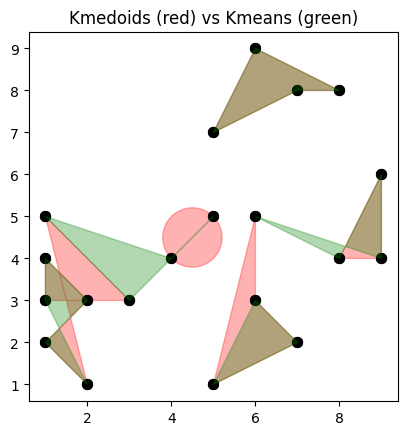

In [17]:
figure , axes = plt.subplots()

plt_kmedoids = plt.scatter(dataset[:, 0], dataset[:, 1], s=50, color= 'black' )
k_medoids_labels = kmedoids.labels_
for i in range(k+1):
    clust = []
    for j in range(len(k_medoids_labels)):
        if k_medoids_labels[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
   
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3, color = 'red',label='kmedoids')
        axes.set_aspect(1)
        axes.add_artist(circle)    
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3, color= 'red')
    
    
    

center
kmeans
y_kmeans
plt_kmeans = plt.scatter(dataset[:, 0], dataset[:, 1], color='black', s=50)

for i in range(k+1):
    clust = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3, color = 'green')
        axes.set_aspect(1)
        axes.add_artist(circle)  
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3, color='green')
        
    

plt.title("Kmedoids (red) vs Kmeans (green)")
plt.show()

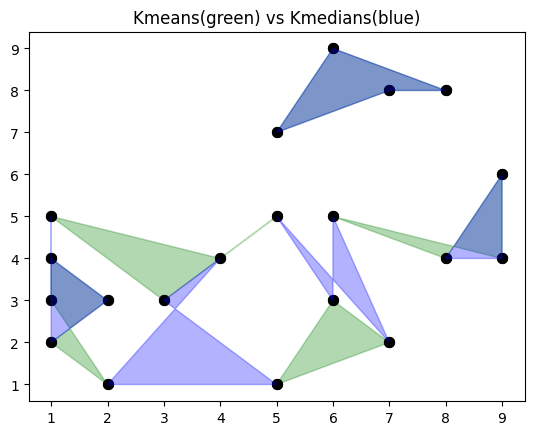

In [18]:
figure , axes = plt.subplots()
center
kmeans
y_kmeans
plt_kmeans = plt.scatter(dataset[:, 0], dataset[:, 1], color='black', s=50)

for i in range(k+1):
    clust = []
    for j in range(len(y_kmeans)):
        if y_kmeans[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3, color = 'green',)
        axes.set_aspect(1)
        axes.add_artist(circle)  
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3, color='green')


clusters = kmedian.get_clusters()
k_median_cluster= [-1]*len(dataset)
for i in range(len(clusters)):
    temp = clusters[i]
    for j in range(len(dataset)):
        for k in range(len(temp)):
            if j == temp[k]:
                k_median_cluster[j] = i

medians = kmedian.get_medians()
medians= np.array(medians)
plt_kmedians = plt.scatter(dataset[:, 0], dataset[:, 1], s=50, color='black')



for i in range(k+1):
    clust = []
    for j in range(len(k_median_cluster)):
        if k_median_cluster[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3,color='blue')
        axes.set_aspect(1)
        axes.add_artist(circle)  
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3,color='blue')
        
plt.title('Kmeans(green) vs Kmedians(blue)') 
plt.show()

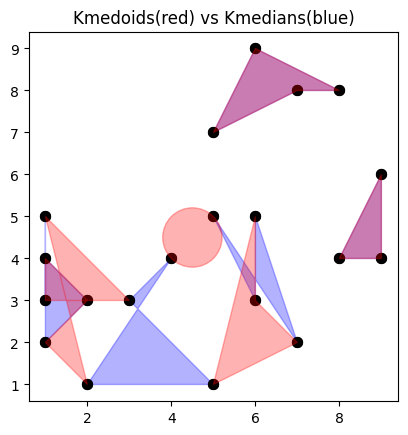

In [19]:
figure , axes = plt.subplots()
clusters = kmedian.get_clusters()
k_median_cluster= [-1]*len(dataset)
for i in range(len(clusters)):
    temp = clusters[i]
    for j in range(len(dataset)):
        for k in range(len(temp)):
            if j == temp[k]:
                k_median_cluster[j] = i

medians = kmedian.get_medians()
medians= np.array(medians)
plt_kmedians = plt.scatter(dataset[:, 0], dataset[:, 1], s=50, color='black')



for i in range(k+1):
    clust = []
    for j in range(len(k_median_cluster)):
        if k_median_cluster[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3,color='blue')
        axes.set_aspect(1)
        axes.add_artist(circle)  
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3,color='blue')


plt_kmedoids = plt.scatter(dataset[:, 0], dataset[:, 1], s=50, color= 'black' )
k_medoids_labels = kmedoids.labels_
for i in range(k+1):
    clust = []
    for j in range(len(k_medoids_labels)):
        if k_medoids_labels[j] == i:
            clust.append(dataset[j])
            
    clust= np.array(clust)
   
    if(len(clust)==2):
        x = sum(clust[:,0])/2
        y = sum(clust[:,1])/2
        r=math.dist(clust[0,:],(x,y))
        circle = plt.Circle((x,y),r, alpha=0.3, color = 'red',label='kmedoids')
        
        axes.set_aspect(1)
        axes.add_artist(circle)    
    elif(len(clust)>2):
        plt.fill(clust[:,0], clust[:,1],alpha=0.3, color= 'red')
    
          
plt.title('Kmedoids(red) vs Kmedians(blue)')
plt.show()

Based on the results of the area's and graphs presented all of the clustering models produce slightly different clusterings. Based on the graphs created there are some similarites among the clustering algorithms however, each have unique clusterings. Kmedoids for example is the only clustering out of the 3 that has a cluster with only 2 points. In addition to this cluster 1 was created the same in each of the different clustering algorithms. While looking at k-median and k-medoids cluster 2 is the same between them but not k-means.

This project was not intended to determine which clustering algorithm is "better" because they each have their own purpose depending on the project. The purpose was to view and compare the various clusters and find a way to comapre each. From the visuals and table of areas I can conclude that there are some similarities between the clustering algorithms with certain data points however, overall each one produced very different overall clusterings. All clustering algoirthms created clusters within the same area range from 0.5-2.5. One interesting observation to note about the clusterings is each type k-means, k-medians and k-medoids have 2 clusters in them with similar or exact same area: kmeans clusters 1 and 2 both have an area of 2, kmedoids clusters 0 and 4 have about an area of 1.5 and kmedians has clusters 1 and 2 with an area of 2.